<a href="https://colab.research.google.com/github/gilbert09031/machine-learning-team-project/blob/main/GoEmotions%2BRedditCommentsVersion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

반지도 학습을 위한 GoEmotions + Reddit Comments 전처리 및 EDA


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

print("=" * 80)
print("GoEmotions 데이터 로드 및 중복 제거")
print("=" * 80)

print("\n[1] 데이터 로드 중...")
goemotions1 = pd.read_csv('/content/goemotions_1.csv')
goemotions2 = pd.read_csv('/content/goemotions_2.csv')
goemotions3 = pd.read_csv('/content/goemotions_3.csv')

print(f"GoEmotions1: {goemotions1.shape}")
print(f"GoEmotions2: {goemotions2.shape}")
print(f"GoEmotions3: {goemotions3.shape}")

print(f"\n[2] 컬럼 확인")
print(f"Columns: {goemotions1.columns.tolist()}")

GoEmotions 데이터 로드 및 중복 제거

[1] 데이터 로드 중...
GoEmotions1: (70000, 37)
GoEmotions2: (70000, 37)
GoEmotions3: (71225, 37)

[2] 컬럼 확인
Columns: ['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


In [ ]:
print("\n" + "=" * 80)
print("병합 전 데이터 정보")
print("=" * 80)

for i, df in enumerate([goemotions1, goemotions2, goemotions3], 1):
    print(f"\n[GoEmotions{i}]")
    print(f"  - Shape: {df.shape}")
    print(f"  - ID 컬럼 존재: {'id' in df.columns}")
    if 'id' in df.columns:
        print(f"  - 고유 ID 수: {df['id'].nunique():,}")
        print(f"  - 중복 ID 수: {df['id'].duplicated().sum():,}")
    print(f"  - 결측치: {df.isnull().sum().sum()}")


병합 전 데이터 정보

[GoEmotions1]
  - Shape: (70000, 37)
  - ID 컬럼 존재: True
  - 고유 ID 수: 43,358
  - 중복 ID 수: 26,642
  - 결측치: 0

[GoEmotions2]
  - Shape: (70000, 37)
  - ID 컬럼 존재: True
  - 고유 ID 수: 43,448
  - 중복 ID 수: 26,552
  - 결측치: 0

[GoEmotions3]
  - Shape: (71225, 37)
  - ID 컬럼 존재: True
  - 고유 ID 수: 43,884
  - 중복 ID 수: 27,341
  - 결측치: 0


In [ ]:
print("\n" + "=" * 80)
print("데이터 병합")
print("=" * 80)

df_combined = pd.concat([goemotions1, goemotions2, goemotions3], axis=0, ignore_index=True)

print(f"\n병합 완료")
print(f"  - 병합 전 총 행 수: {len(goemotions1) + len(goemotions2) + len(goemotions3):,}")
print(f"  - 병합 후 총 행 수: {len(df_combined):,}")
print(f"  - Shape: {df_combined.shape}")


데이터 병합

병합 완료
  - 병합 전 총 행 수: 211,225
  - 병합 후 총 행 수: 211,225
  - Shape: (211225, 37)


In [ ]:
print("\n" + "=" * 80)
print("ID 기준 중복 확인")
print("=" * 80)

if 'id' in df_combined.columns:
    total_rows = len(df_combined)
    unique_ids = df_combined['id'].nunique()
    duplicate_count = total_rows - unique_ids

    print(f"\n[중복 통계]")
    print(f"  - 전체 행 수: {total_rows:,}")
    print(f"  - 고유 ID 수: {unique_ids:,}")
    print(f"  - 중복된 행 수: {duplicate_count:,}")
    print(f"  - 중복 비율: {(duplicate_count / total_rows * 100):.2f}%")
else:
    print("ID 컬럼이 존재하지 않습니다.")


ID 기준 중복 확인

[중복 통계]
  - 전체 행 수: 211,225
  - 고유 ID 수: 58,011
  - 중복된 행 수: 153,214
  - 중복 비율: 72.54%


In [ ]:
print("\n" + "=" * 80)
print("중복 제거 실행")
print("=" * 80)

if 'id' in df_combined.columns:
    before_dedup = len(df_combined)

    df_deduped = df_combined.drop_duplicates(subset=['id'], keep='first')

    after_dedup = len(df_deduped)
    removed = before_dedup - after_dedup

    print(f"\n중복 제거 완료")
    print(f"  - 제거 전: {before_dedup:,} 행")
    print(f"  - 제거 후: {after_dedup:,} 행")
    print(f"  - 제거된 행: {removed:,} 행 ({removed/before_dedup*100:.2f}%)")
    print(f"  - 최종 Shape: {df_deduped.shape}")

    remaining_duplicates = df_deduped['id'].duplicated().sum()
    print(f"\n[검증] 남은 중복 ID: {remaining_duplicates}")
else:
    df_deduped = df_combined
    print("ID 컬럼이 없어 중복 제거를 건너뜁니다.")


중복 제거 실행

중복 제거 완료
  - 제거 전: 211,225 행
  - 제거 후: 58,011 행
  - 제거된 행: 153,214 행 (72.54%)
  - 최종 Shape: (58011, 37)

[검증] 남은 중복 ID: 0


In [ ]:
print("\n" + "=" * 80)
print("example_very_unclear = True인 행 제거")
print("=" * 80)

if 'example_very_unclear' in df_deduped.columns:
    before_removal = len(df_deduped)

    print(f"\n[제거 전 상태]")
    print(f"  - 전체 행 수: {before_removal:,}")
    print(f"\n[example_very_unclear 값 분포]")
    print(df_deduped['example_very_unclear'].value_counts())

    unclear_count = (df_deduped['example_very_unclear'] == True).sum()
    print(f"\n  - unclear = True인 행: {unclear_count:,} ({unclear_count/before_removal*100:.2f}%)")

    df_deduped = df_deduped[df_deduped['example_very_unclear'] != True]

    after_removal = len(df_deduped)
    removed = before_removal - after_removal

    print(f"\n제거 완료")
    print(f"  - 제거 후 행 수: {after_removal:,}")
    print(f"  - 제거된 행 수: {removed:,} ({removed/before_removal*100:.2f}%)")
    print(f"  - 최종 Shape: {df_deduped.shape}")

    df_deduped = df_deduped.drop(columns=['example_very_unclear'])
    print(f"\nexample_very_unclear 컬럼 삭제 완료")
else:
    print("example_very_unclear 컬럼이 존재하지 않습니다.")


example_very_unclear = True인 행 제거

[제거 전 상태]
  - 전체 행 수: 58,011

[example_very_unclear 값 분포]
example_very_unclear
False    57164
True       847
Name: count, dtype: int64

  - unclear = True인 행: 847 (1.46%)

제거 완료
  - 제거 후 행 수: 57,164
  - 제거된 행 수: 847 (1.46%)
  - 최종 Shape: (57164, 37)

example_very_unclear 컬럼 삭제 완료


In [ ]:
print("\n" + "=" * 80)
print("필요한 컬럼만 선택 (text + 감정 레이블)")
print("=" * 80)

emotion_cols = ['admiration', 'amusement', 'anger', 'annoyance', 'approval',
                'caring', 'confusion', 'curiosity', 'desire', 'disappointment',
                'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear',
                'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism',
                'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']

available_emotions = [col for col in emotion_cols if col in df_deduped.columns]

print(f"\n[컬럼 선택 전]")
print(f"  - 전체 컬럼 수: {len(df_deduped.columns)}")
print(f"  - Shape: {df_deduped.shape}")

if 'text' in df_deduped.columns:
    cols_to_keep = ['text'] + available_emotions

    print(f"\n[유지할 컬럼]")
    print(f"  - text: 1개")
    print(f"  - 감정 레이블: {len(available_emotions)}개")
    print(f"  - 총 {len(cols_to_keep)}개 컬럼 유지")

    df_deduped = df_deduped[cols_to_keep].copy()

    print(f"\n[컬럼 선택 후]")
    print(f"  - 전체 컬럼 수: {len(df_deduped.columns)}")
    print(f"  - Shape: {df_deduped.shape}")

    print(f"\n컬럼 선택 완료")
else:
    print("text 컬럼을 찾을 수 없습니다.")


필요한 컬럼만 선택 (text + 감정 레이블)

[컬럼 선택 전]
  - 전체 컬럼 수: 36
  - Shape: (57164, 36)

[유지할 컬럼]
  - text: 1개
  - 감정 레이블: 28개
  - 총 29개 컬럼 유지

[컬럼 선택 후]
  - 전체 컬럼 수: 29
  - Shape: (57164, 29)

컬럼 선택 완료


In [ ]:
print("=" * 80)
print("Reddit Comments 전처리 시작")
print("=" * 80)

print("\n[1] 데이터 로드 중")
reddit_comments = pd.read_csv('/content/reddit_comments.csv')

print(f"Reddit Comments: {reddit_comments.shape}")

print(f"\n[2] 원본 컬럼 확인")
print(f"  - 전체 컬럼 수: {len(reddit_comments.columns)}")
print(f"  - 컬럼 목록:")
for i, col in enumerate(reddit_comments.columns, 1):
    print(f"    {i:2d}. {col}")

print(f"\n[3] body 컬럼 확인")
if 'body' in reddit_comments.columns:
    print(f"  - 결측치: {reddit_comments['body'].isnull().sum():,} ({reddit_comments['body'].isnull().sum()/len(reddit_comments)*100:.2f}%)")
else:
    print(f"  'body' 컬럼이 존재하지 않습니다!")

Reddit Comments 전처리 시작

[1] 데이터 로드 중
Reddit Comments: (49058, 10)

[2] 원본 컬럼 확인
  - 전체 컬럼 수: 10
  - 컬럼 목록:
     1. Unnamed: 0
     2. subreddit
     3. id
     4. submission_id
     5. body
     6. created_utc
     7. parent_id
     8. permalink
     9. token_size
    10. perplexity

[3] body 컬럼 확인
  - 결측치: 0 (0.00%)


In [ ]:
print("\n" + "=" * 80)
print("body 컬럼만 선택")
print("=" * 80)

if 'body' in reddit_comments.columns:
    before_cols = len(reddit_comments.columns)
    before_rows = len(reddit_comments)

    print(f"\n[제거 전]")
    print(f"  - 행 수: {before_rows:,}")
    print(f"  - 컬럼 수: {before_cols}")
    print(f"  - Shape: {reddit_comments.shape}")

    reddit_unlabeled = reddit_comments[['body']].copy()

    after_cols = len(reddit_unlabeled.columns)
    after_rows = len(reddit_unlabeled)

    print(f"\n[제거 후]")
    print(f"  - 행 수: {after_rows:,}")
    print(f"  - 컬럼 수: {after_cols}")
    print(f"  - Shape: {reddit_unlabeled.shape}")
    print(f"  - 제거된 컬럼 수: {before_cols - after_cols}")

    print(f"\nbody 컬럼 선택 완료")
else:
    print("body 컬럼을 찾을 수 없습니다.")


body 컬럼만 선택

[제거 전]
  - 행 수: 49,058
  - 컬럼 수: 10
  - Shape: (49058, 10)

[제거 후]
  - 행 수: 49,058
  - 컬럼 수: 1
  - Shape: (49058, 1)
  - 제거된 컬럼 수: 9

body 컬럼 선택 완료


In [ ]:
def count_words(text):
    if pd.isna(text):
        return 0
    return len(str(text).split())

print("\nGoEmotions 단어 개수 계산 중...")
df_deduped['word_count'] = df_deduped['text'].apply(count_words)

print("Reddit Comments 단어 개수 계산 중...")
reddit_unlabeled['word_count'] = reddit_unlabeled['body'].apply(count_words)

print("단어 개수 계산 완료")


GoEmotions 단어 개수 계산 중...
Reddit Comments 단어 개수 계산 중...
단어 개수 계산 완료


In [ ]:
print("\n" + "=" * 80)
print("단어 개수 기본 통계")
print("=" * 80)

print("\n[GoEmotions - Labeled Data]")
print(f"  - 평균: {df_deduped['word_count'].mean():.2f}")
print(f"  - 중앙값: {df_deduped['word_count'].median():.2f}")
print(f"  - 표준편차: {df_deduped['word_count'].std():.2f}")
print(f"  - 최소값: {df_deduped['word_count'].min()}")
print(f"  - 최대값: {df_deduped['word_count'].max()}")

print("\n[Reddit Comments - Unlabeled Data]")
print(f"  - 평균: {reddit_unlabeled['word_count'].mean():.2f}")
print(f"  - 중앙값: {reddit_unlabeled['word_count'].median():.2f}")
print(f"  - 표준편차: {reddit_unlabeled['word_count'].std():.2f}")
print(f"  - 최소값: {reddit_unlabeled['word_count'].min()}")
print(f"  - 최대값: {reddit_unlabeled['word_count'].max()}")


단어 개수 기본 통계

[GoEmotions - Labeled Data]
  - 평균: 12.94
  - 중앙값: 12.00
  - 표준편차: 6.68
  - 최소값: 1
  - 최대값: 33

[Reddit Comments - Unlabeled Data]
  - 평균: 34.05
  - 중앙값: 19.00
  - 표준편차: 43.98
  - 최소값: 1
  - 최대값: 443


In [ ]:
print("\n" + "=" * 80)
print("백분위 분포 (Percentile Distribution)")
print("=" * 80)

percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]

print("\n[GoEmotions]")
print("백분위\t단어 개수")
print("-" * 30)
for p in percentiles:
    value = np.percentile(df_deduped['word_count'], p)
    print(f"{p:3d}%\t{value:.1f}")

print("\n[Reddit Comments]")
print("백분위\t단어 개수")
print("-" * 30)
for p in percentiles:
    value = np.percentile(reddit_unlabeled['word_count'], p)
    print(f"{p:3d}%\t{value:.1f}")

percentile_df = pd.DataFrame({
    'Percentile': percentiles,
    'GoEmotions': [np.percentile(df_deduped['word_count'], p) for p in percentiles],
    'Reddit': [np.percentile(reddit_unlabeled['word_count'], p) for p in percentiles]
})

print("\n[비교표]")
print(percentile_df.to_string(index=False))


백분위 분포 (Percentile Distribution)

[GoEmotions]
백분위	단어 개수
------------------------------
  1%	2.0
  5%	3.0
 10%	4.0
 25%	7.0
 50%	12.0
 75%	18.0
 90%	23.0
 95%	24.0
 99%	27.0

[Reddit Comments]
백분위	단어 개수
------------------------------
  1%	1.0
  5%	3.0
 10%	4.0
 25%	9.0
 50%	19.0
 75%	41.0
 90%	80.0
 95%	118.0
 99%	228.0

[비교표]
 Percentile  GoEmotions  Reddit
          1         2.0     1.0
          5         3.0     3.0
         10         4.0     4.0
         25         7.0     9.0
         50        12.0    19.0
         75        18.0    41.0
         90        23.0    80.0
         95        24.0   118.0
         99        27.0   228.0


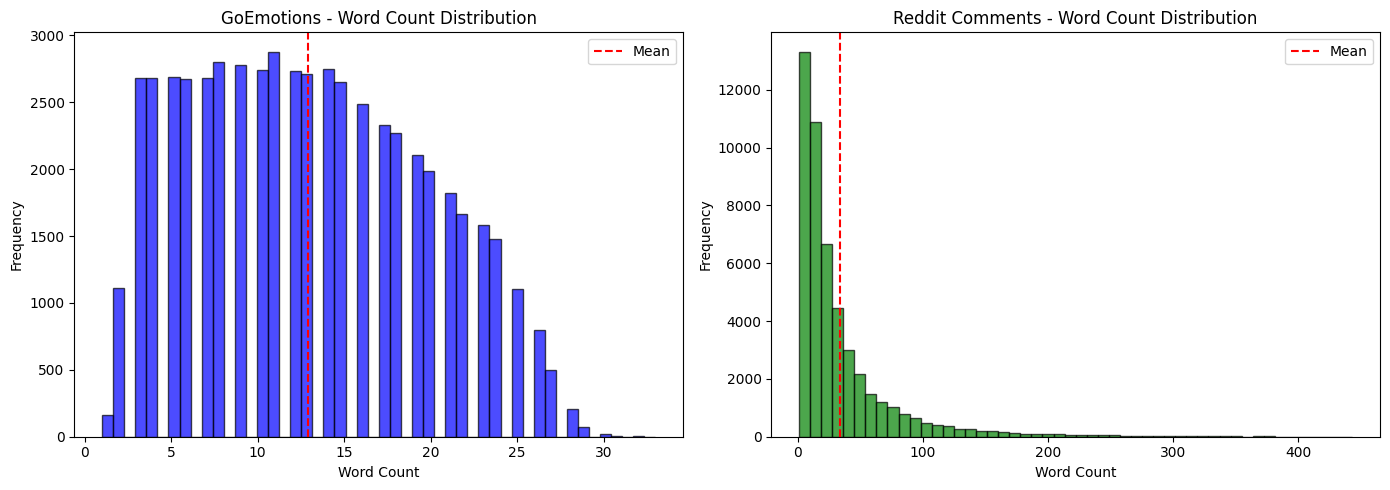

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df_deduped['word_count'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Frequency')
axes[0].set_title('GoEmotions - Word Count Distribution')
axes[0].axvline(df_deduped['word_count'].mean(), color='red', linestyle='--', label='Mean')
axes[0].legend()

axes[1].hist(reddit_unlabeled['word_count'], bins=50, alpha=0.7, color='green', edgecolor='black')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Reddit Comments - Word Count Distribution')
axes[1].axvline(reddit_unlabeled['word_count'].mean(), color='red', linestyle='--', label='Mean')
axes[1].legend()

plt.tight_layout()
plt.show()

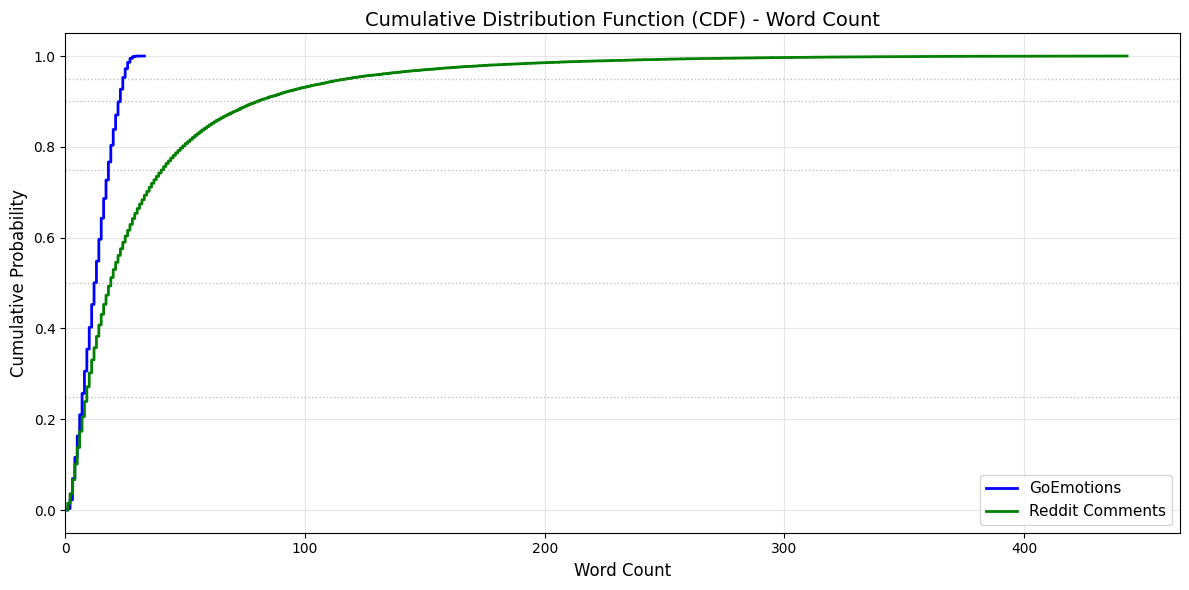

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

goemotions_sorted = np.sort(df_deduped['word_count'])
goemotions_cdf = np.arange(1, len(goemotions_sorted) + 1) / len(goemotions_sorted)

reddit_sorted = np.sort(reddit_unlabeled['word_count'])
reddit_cdf = np.arange(1, len(reddit_sorted) + 1) / len(reddit_sorted)

ax.plot(goemotions_sorted, goemotions_cdf, label='GoEmotions', linewidth=2, color='blue')
ax.plot(reddit_sorted, reddit_cdf, label='Reddit Comments', linewidth=2, color='green')

for p in [25, 50, 75, 90, 95]:
    ax.axhline(p/100, color='gray', linestyle=':', alpha=0.5, linewidth=1)

ax.set_xlabel('Word Count', fontsize=12)
ax.set_ylabel('Cumulative Probability', fontsize=12)
ax.set_title('Cumulative Distribution Function (CDF) - Word Count', fontsize=14)
ax.legend(fontsize=11)
ax.grid(True, alpha=0.3)
ax.set_xlim(left=0)

plt.tight_layout()
plt.show()

In [ ]:
print("=" * 80)
print("Reddit Comments 이상치 제거 (단어 개수 기준)")
print("=" * 80)

max_word_count = 41

print(f"\n[제거 기준]")
print(f"  - 최대 단어 개수: {max_word_count}")
print(f"  - 기준: Reddit Comments 75% 백분위")

before_removal = len(reddit_unlabeled)

print(f"\n[제거 전 상태]")
print(f"  - 전체 행 수: {before_removal:,}")
print(f"  - 평균 단어 수: {reddit_unlabeled['word_count'].mean():.2f}")
print(f"  - 중앙값: {reddit_unlabeled['word_count'].median():.2f}")
print(f"  - 최대값: {reddit_unlabeled['word_count'].max():.0f}")

to_remove = reddit_unlabeled['word_count'] > max_word_count
remove_count = to_remove.sum()

print(f"\n[제거 대상]")
print(f"  - {max_word_count}단어 초과: {remove_count:,}개 ({remove_count/before_removal*100:.2f}%)")

reddit_unlabeled = reddit_unlabeled[reddit_unlabeled['word_count'] <= max_word_count]

after_removal = len(reddit_unlabeled)

print(f"\n이상치 제거 완료")
print(f"\n[제거 후 상태]")
print(f"  - 전체 행 수: {after_removal:,}")
print(f"  - 제거된 행: {before_removal - after_removal:,}개")
print(f"  - 유지율: {after_removal/before_removal*100:.2f}%")
print(f"  - 평균 단어 수: {reddit_unlabeled['word_count'].mean():.2f}")
print(f"  - 중앙값: {reddit_unlabeled['word_count'].median():.2f}")
print(f"  - 최대값: {reddit_unlabeled['word_count'].max():.0f}")
print(f"  - 최종 Shape: {reddit_unlabeled.shape}")

Reddit Comments 이상치 제거 (단어 개수 기준)

[제거 기준]
  - 최대 단어 개수: 41
  - 기준: Reddit Comments 75% 백분위

[제거 전 상태]
  - 전체 행 수: 49,058
  - 평균 단어 수: 34.05
  - 중앙값: 19.00
  - 최대값: 443

[제거 대상]
  - 41단어 초과: 11,955개 (24.37%)

이상치 제거 완료

[제거 후 상태]
  - 전체 행 수: 37,103
  - 제거된 행: 11,955개
  - 유지율: 75.63%
  - 평균 단어 수: 15.70
  - 중앙값: 13.00
  - 최대값: 41
  - 최종 Shape: (37103, 2)


## 토큰 분석

In [ ]:
from collections import Counter
import re

def tokenize(text):
    if pd.isna(text):
        return []
    text = str(text).lower()
    tokens = re.findall(r'\b[a-z0-9]+\b', text)
    return tokens

print("토큰화 함수 준비 완료")

토큰화 함수 준비 완료


In [ ]:
print("\n" + "=" * 80)
print("GoEmotions 토큰 빈도 계산")
print("=" * 80)

print("\n[GoEmotions] 토큰 추출 중...")
goemotions_tokens = []
for text in df_deduped['text']:
    goemotions_tokens.extend(tokenize(text))

goemotions_counter = Counter(goemotions_tokens)

print(f"\n토큰 추출 완료")
print(f"  - 총 토큰 수 (중복 포함): {len(goemotions_tokens):,}")
print(f"  - 고유 토큰 수: {len(goemotions_counter):,}")
print(f"  - 평균 등장 빈도: {len(goemotions_tokens) / len(goemotions_counter):.2f}")


GoEmotions 토큰 빈도 계산

[GoEmotions] 토큰 추출 중...

토큰 추출 완료
  - 총 토큰 수 (중복 포함): 767,104
  - 고유 토큰 수: 30,248
  - 평균 등장 빈도: 25.36


In [ ]:
print("=" * 80)
print("1단계: 숫자만 있는 토큰 분석")
print("=" * 80)

numeric_only_tokens = [(token, count) for token, count in goemotions_counter.items() if token.isdigit()]

print(f"\n[기본 정보]")
print(f"  - 숫자만 있는 토큰 수: {len(numeric_only_tokens):,}개")
print(f"  - 전체 토큰 대비: {len(numeric_only_tokens) / len(goemotions_counter) * 100:.2f}%")

numeric_sorted = sorted(numeric_only_tokens, key=lambda x: x[1], reverse=True)

print(f"\n[빈도 높은 숫자 토큰 Top 20]")
print(f"{'토큰':<20} {'빈도':<10}")
print("-" * 30)

for token, count in numeric_sorted[:20]:
    print(f"{token:<20} {count:>5}회")

1단계: 숫자만 있는 토큰 분석

[기본 정보]
  - 숫자만 있는 토큰 수: 351개
  - 전체 토큰 대비: 1.16%

[빈도 높은 숫자 토큰 Top 20]
토큰                   빈도        
------------------------------
2                      574회
3                      516회
1                      427회
5                      338회
10                     276회
4                      238회
6                      183회
20                     160회
0                      146회
100                    146회
7                      132회
30                     117회
8                      115회
15                      99회
9                       99회
12                      84회
40                      69회
2019                    64회
25                      63회
50                      63회


In [ ]:
print("=" * 80)
print("숫자만 있는 토큰 제거 실행")
print("=" * 80)

def remove_numeric_only(text):
    if pd.isna(text):
        return text

    # 이미 소문자화 및 토큰화가 되었다고 가정하고, isdigit()으로 숫자만 있는 토큰을 제거
    tokens = [token for token in str(text).lower().split() if not token.isdigit()]

    # 원본 텍스트는 아직 원형을 유지하고 있으므로, 원본 텍스트에서 숫자를 제거하는 함수를 다시 정의
    # tokenize 함수가 re.findall(r'\b[a-z0-9]+\b', text)를 사용하므로, 토큰 단위로 처리
    tokens = tokenize(text)
    filtered_tokens = [token for token in tokens if not token.isdigit()]

    return ' '.join(filtered_tokens)

print("\n[GoEmotions 처리 중...]")
before_ge = df_deduped['text'].copy()
df_deduped['text'] = df_deduped['text'].apply(remove_numeric_only)


changed_ge = (before_ge != df_deduped['text']).sum()
print(f"변경된 텍스트: {changed_ge:,}개 ({changed_ge/len(df_deduped)*100:.2f}%)")

print("\n[Reddit Comments 처리 중...]")
before_reddit = reddit_unlabeled['body'].copy()
reddit_unlabeled['body'] = reddit_unlabeled['body'].apply(remove_numeric_only)

print("\n[GoEmotions] 변경된 텍스트 예시 (숫자가 제거되어 길이가 줄어든 경우, 최대 5개):")
changed_ge_indices = before_ge[before_ge != df_deduped['text']].index

changed_reddit = (before_reddit != reddit_unlabeled['body']).sum()
print(f"변경된 텍스트: {changed_reddit:,}개 ({changed_reddit/len(reddit_unlabeled)*100:.2f}%)")

print("\n[토큰 통계 재계산 중...]")
goemotions_tokens_new = []
for text in df_deduped['text']:
    goemotions_tokens_new.extend(tokenize(text))

goemotions_counter_new = Counter(goemotions_tokens_new)

print("\n[변화 요약]")
print(f"  - 제거 전 고유 토큰: {len(goemotions_counter):,}개")
print(f"  - 제거 후 고유 토큰: {len(goemotions_counter_new):,}개")
print(f"  - 감소: {len(goemotions_counter) - len(goemotions_counter_new):,}개")

numeric_remaining = sum(1 for token in goemotions_counter_new.keys() if token.isdigit())
print(f"\n[검증] 남은 숫자 토큰: {numeric_remaining}개")

goemotions_counter = goemotions_counter_new

숫자만 있는 토큰 제거 실행

[GoEmotions 처리 중...]
변경된 텍스트: 56,499개 (98.84%)

[Reddit Comments 처리 중...]

[GoEmotions] 변경된 텍스트 예시 (숫자가 제거되어 길이가 줄어든 경우, 최대 5개):
변경된 텍스트: 36,522개 (98.43%)

[토큰 통계 재계산 중...]

[변화 요약]
  - 제거 전 고유 토큰: 30,248개
  - 제거 후 고유 토큰: 29,897개
  - 감소: 351개

[검증] 남은 숫자 토큰: 0개


In [ ]:
print("=" * 80)
print("2단계: 중복 문자 분석")
print("=" * 80)

import re

def has_repetition(token, min_repeat=3):
    pattern = r'(.)\1{' + str(min_repeat-1) + r',}'
    return bool(re.search(pattern, token))

repetition_tokens = [(token, count) for token, count in goemotions_counter.items()
                     if has_repetition(token, min_repeat=3)]

print(f"\n[기본 정보]")
print(f"  - 반복 문자 포함 토큰: {len(repetition_tokens):,}개")
print(f"  - 전체 토큰 대비: {len(repetition_tokens) / len(goemotions_counter) * 100:.2f}%")

repetition_sorted = sorted(repetition_tokens, key=lambda x: x[1], reverse=True)

print(f"\n[빈도 높은 반복 문자 토큰 Top 20]")
print(f"{'토큰':<30} {'빈도':<10}")
print("-" * 40)

for token, count in repetition_sorted[:20]:
    print(f"{token:<30} {count:>5}회")

2단계: 중복 문자 분석

[기본 정보]
  - 반복 문자 포함 토큰: 539개
  - 전체 토큰 대비: 1.80%

[빈도 높은 반복 문자 토큰 Top 20]
토큰                             빈도        
----------------------------------------
ahhh                              30회
soooo                             24회
hmmm                              22회
sooo                              21회
oooh                              17회
ohhh                              11회
mmmm                              11회
ahhhh                             10회
sooooo                            10회
aaa                                9회
noooo                              9회
ohhhhh                             9회
ohhhh                              8회
hmmmmm                             8회
woooosh                            8회
mmm                                8회
oooo                               7회
hmmmm                              7회
ayyy                               7회
uhhhh                              6회


In [ ]:
print("=" * 80)
print("중복 문자 정규화 실행 (max_repeat=2)")
print("=" * 80)

def normalize_repetition(text, max_repeat=2):
    if pd.isna(text):
        return text
    pattern = r'(.)\1{' + str(max_repeat) + r',}'
    normalized = re.sub(pattern, r'\1' * max_repeat, str(text))
    return normalized

print("\n[GoEmotions 정규화 중...]")
before_ge = df_deduped['text'].copy()
df_deduped['text'] = df_deduped['text'].apply(lambda x: normalize_repetition(x, max_repeat=2))

print("\n[GoEmotions] 변경된 텍스트 예시 (최대 5개):")
changed_ge_indices = before_ge[before_ge != df_deduped['text']].index
if not changed_ge_indices.empty:
    for idx in changed_ge_indices[:5]:
        print(f"  - 원본: {before_ge.loc[idx]}")
        print(f"  - 변경: {df_deduped['text'].loc[idx]}")
        print("-" * 20)

changed_ge = (before_ge != df_deduped['text']).sum()
print(f"변경된 텍스트: {changed_ge:,}개 ({changed_ge/len(df_deduped)*100:.2f}%)")

print("\n[Reddit Comments 정규화 중...]")
before_reddit = reddit_unlabeled['body'].copy()
reddit_unlabeled['body'] = reddit_unlabeled['body'].apply(lambda x: normalize_repetition(x, max_repeat=2))

print("\n[Reddit Comments] 변경된 텍스트 예시 (최대 5개):")
changed_reddit_indices = before_reddit[before_reddit != reddit_unlabeled['body']].index
if not changed_reddit_indices.empty:
    for idx in changed_reddit_indices[:5]:
        print(f"  - 원본: {before_reddit.loc[idx]}")
        print(f"  - 변경: {reddit_unlabeled['body'].loc[idx]}")
        print("-" * 20)

changed_reddit = (before_reddit != reddit_unlabeled['body']).sum()
print(f"변경된 텍스트: {changed_reddit:,}개 ({changed_reddit/len(reddit_unlabeled)*100:.2f}%)")

print("\n[토큰 통계 재계산 중...]")
goemotions_tokens_new = []
for text in df_deduped['text']:
    goemotions_tokens_new.extend(tokenize(text))

goemotions_counter_new = Counter(goemotions_tokens_new)

print(f"\n[변화 요약]")
print(f"  - 정규화 전 고유 토큰: {len(goemotions_counter):,}개")
print(f"  - 정규화 후 고유 토큰: {len(goemotions_counter_new):,}개")
print(f"  - 감소: {len(goemotions_counter) - len(goemotions_counter_new):,}개")

repetition_remaining = sum(1 for token in goemotions_counter_new.keys()
                          if has_repetition(token, min_repeat=3))
print(f"\n[검증] 남은 반복 문자 토큰 (3회 이상): {repetition_remaining}개")

goemotions_counter = goemotions_counter_new

중복 문자 정규화 실행 (max_repeat=2)

[GoEmotions 정규화 중...]

[GoEmotions] 변경된 텍스트 예시 (최대 5개):
  - 원본: sponge blurb pubs quaw haha gurr ha aaa finale is too real
  - 변경: sponge blurb pubs quaw haha gurr ha aa finale is too real
--------------------
  - 원본: seeeee we have one of them coloureds too
  - 변경: see we have one of them coloureds too
--------------------
  - 원본: hmmm i dont think i listen to only name if i last checked these arent intp playlists they re just playlists i like as an intp
  - 변경: hmm i dont think i listen to only name if i last checked these arent intp playlists they re just playlists i like as an intp
--------------------
  - 원본: no biggie dude sorry i got all triggered i just reeeally love name
  - 변경: no biggie dude sorry i got all triggered i just reeally love name
--------------------
  - 원본: they have the best tortillas too made right in front of you mmmmmm
  - 변경: they have the best tortillas too made right in front of you mm
--------------------
변경된 텍스트: 844개 (1.48%

In [ ]:
token_lengths = {token: len(token) for token in goemotions_counter.keys()}
lengths = list(token_lengths.values())

long_tokens = [(token, len(token), goemotions_counter[token])
               for token in goemotions_counter.keys() if len(token) >= 20]

long_sorted = sorted(long_tokens, key=lambda x: x[1], reverse=True)

print(f"20자 이상 긴 토큰: {len(long_tokens):,}개")

if len(long_tokens) > 0:
    for i, (token, length, freq) in enumerate(long_sorted[:10], 1):
        print(f"{i:2d}. {token} ({length}자, {freq}회)")

20자 이상 긴 토큰: 25개
 1. wubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwub (270자, 1회)
 2. hahahahahahahahahahahahahahahahahahahahahahahahahahhahahahhahahaa (65자, 1회)
 3. djeeoowwobrrbrbrbrrgrrdrrjrhrrjrrerhrjrgrhrrjrhrhrbrj (53자, 1회)
 4. terribletrollisterribleattrolling (33자, 1회)
 5. hahahahahahahahahahahahaha (26자, 1회)
 6. 22meirl4meirl42meirl4meirl (26자, 1회)
 7. shiznittlebamsnipsnapsack (25자, 1회)
 8. uberpooltoprisonpipeline (24자, 1회)
 9. amusementparkshenanigans (24자, 1회)
10. ididnotvoteforthisclown (23자, 1회)


In [ ]:
print("=" * 80)
print("3단계: 긴 토큰 제거 (20자 초과)")
print("=" * 80)

max_token_length = 20

def remove_long_tokens(text, max_length=20):
    if pd.isna(text):
        return text

    tokens = tokenize(text)
    filtered_tokens = [token for token in tokens if len(token) <= max_length]

    return ' '.join(filtered_tokens)

print(f"\n[GoEmotions 처리 중... (max_length={max_token_length})]")
before_ge = df_deduped['text'].copy()
df_deduped['text'] = df_deduped['text'].apply(lambda x: remove_long_tokens(x, max_length=max_token_length))

print("\n[GoEmotions] 변경된 텍스트 예시 (최대 5개):")
changed_ge_indices = before_ge[before_ge != df_deduped['text']].index
if not changed_ge_indices.empty:
    for idx in changed_ge_indices[:5]:
        print(f"  - 원본: {before_ge.loc[idx]}")
        print(f"  - 변경: {df_deduped['text'].loc[idx]}")
        print("-" * 20)

changed_ge = (before_ge != df_deduped['text']).sum()
print(f"변경된 텍스트: {changed_ge:,}개 ({changed_ge/len(df_deduped)*100:.2f}%)")

print(f"\n[Reddit Comments 처리 중... (max_length={max_token_length})]")
before_reddit = reddit_unlabeled['body'].copy()
reddit_unlabeled['body'] = reddit_unlabeled['body'].apply(lambda x: remove_long_tokens(x, max_length=max_token_length))

print("\n[Reddit Comments] 변경된 텍스트 예시 (최대 5개):")
changed_reddit_indices = before_reddit[before_reddit != reddit_unlabeled['body']].index
if not changed_reddit_indices.empty:
    for idx in changed_reddit_indices[:5]:
        print(f"  - 원본: {before_reddit.loc[idx]}")
        print(f"  - 변경: {reddit_unlabeled['body'].loc[idx]}")
        print("-" * 20)

changed_reddit = (before_reddit != reddit_unlabeled['body']).sum()
print(f"변경된 텍스트: {changed_reddit:,}개 ({changed_reddit/len(reddit_unlabeled)*100:.2f}%)")

print("\n[토큰 통계 재계산 중...]")
goemotions_tokens_new = []
for text in df_deduped['text']:
    goemotions_tokens_new.extend(tokenize(text))

goemotions_counter_new = Counter(goemotions_tokens_new)

print(f"\n[변화 요약]")
print(f"  - 제거 전 고유 토큰: {len(goemotions_counter):,}개")
print(f"  - 제거 후 고유 토큰: {len(goemotions_counter_new):,}개")
print(f"  - 감소: {len(goemotions_counter) - len(goemotions_counter_new):,}개")

long_remaining = sum(1 for token in goemotions_counter_new.keys() if len(token) > max_token_length)
print(f"\n[검증] 남은 긴 토큰 (>{max_token_length}자): {long_remaining}개")

goemotions_counter = goemotions_counter_new

3단계: 긴 토큰 제거 (20자 초과)

[GoEmotions 처리 중... (max_length=20)]

[GoEmotions] 변경된 텍스트 예시 (최대 5개):
  - 원본: ididnotvoteforthisclown
  - 변경: 
--------------------
  - 원본: i just got banned from one of his subreddits i haven t been this excited for a ban since the snap from r thanosdidnothingwrong
  - 변경: i just got banned from one of his subreddits i haven t been this excited for a ban since the snap from r
--------------------
  - 원본: hahahaahhahahahahahaa no
  - 변경: no
--------------------
  - 원본: no the whippet sound is wubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwubwub and then you need another balloon spot on with the gunshot though just like intense temporary tinnitus
  - 변경: no the whippet sound is and then you need another balloon spot on with the gunshot though just l

In [ ]:
print("=" * 80)
print("4단계: 반복 단어 분석")
print("=" * 80)

import re

def has_word_repetition(text, min_repeat=3):
    if pd.isna(text):
        return False

    words = str(text).lower().split()
    if len(words) < min_repeat:
        return False

    for i in range(len(words) - min_repeat + 1):
        word = words[i]
        is_repeated = all(words[i+j] == word for j in range(min_repeat))
        if is_repeated:
            return True

    return False

def find_repeated_words(text, min_repeat=3):
    if pd.isna(text):
        return []

    words = str(text).lower().split()
    repeated_patterns = []

    i = 0
    while i < len(words):
        word = words[i]
        count = 1

        while i + count < len(words) and words[i + count] == word:
            count += 1

        if count >= min_repeat:
            repeated_patterns.append((word, count))

        i += count

    return repeated_patterns

repetition_samples = []
for text in df_deduped['text']:
    patterns = find_repeated_words(text, min_repeat=3)
    if patterns:
        repetition_samples.append((text, patterns))

print(f"\n반복 단어 포함 텍스트: {len(repetition_samples):,}개 ({len(repetition_samples)/len(df_deduped)*100:.2f}%)")

4단계: 반복 단어 분석

반복 단어 포함 텍스트: 130개 (0.23%)


In [ ]:
print("=" * 80)
print("반복 단어 정규화 실행 (max_repeat=2)")
print("=" * 80)

def normalize_word_repetition(text, max_repeat=2):
    if pd.isna(text):
        return text

    words = str(text).split()
    if len(words) <= 1:
        return text

    normalized_words = []
    i = 0

    while i < len(words):
        word = words[i]
        count = 1

        while i + count < len(words) and words[i + count].lower() == word.lower():
            count += 1

        for _ in range(min(count, max_repeat)):
            normalized_words.append(word)

        i += count

    return ' '.join(normalized_words)

print("\n[GoEmotions 정규화 중...]")
before_ge = df_deduped['text'].copy()
df_deduped['text'] = df_deduped['text'].apply(lambda x: normalize_word_repetition(x, max_repeat=2))

print("\n[GoEmotions] 변경된 텍스트 예시 (최대 5개):")
changed_ge_indices = before_ge[before_ge != df_deduped['text']].index
if not changed_ge_indices.empty:
    for idx in changed_ge_indices[:5]:
        print(f"  - 원본: {before_ge.loc[idx]}")
        print(f"  - 변경: {df_deduped['text'].loc[idx]}")
        print("-" * 20)

changed_ge = (before_ge != df_deduped['text']).sum()
print(f"변경된 텍스트: {changed_ge:,}개 ({changed_ge/len(df_deduped)*100:.2f}%)")

print("\n[Reddit Comments 정규화 중...]")
before_reddit = reddit_unlabeled['body'].copy()
reddit_unlabeled['body'] = reddit_unlabeled['body'].apply(lambda x: normalize_word_repetition(x, max_repeat=2))

print("\n[Reddit Comments] 변경된 텍스트 예시 (최대 5개):")
changed_reddit_indices = before_reddit[before_reddit != reddit_unlabeled['body']].index
if not changed_reddit_indices.empty:
    for idx in changed_reddit_indices[:5]:
        print(f"  - 원본: {before_reddit.loc[idx]}")
        print(f"  - 변경: {reddit_unlabeled['body'].loc[idx]}")
        print("-" * 20)

changed_reddit = (before_reddit != reddit_unlabeled['body']).sum()
print(f"변경된 텍스트: {changed_reddit:,}개 ({changed_reddit/len(reddit_unlabeled)*100:.2f}%)")

print("\n[토큰 통계 재계산 중...]")
goemotions_tokens_new = []
for text in df_deduped['text']:
    goemotions_tokens_new.extend(tokenize(text))

goemotions_counter_new = Counter(goemotions_tokens_new)

print(f"\n[변화 요약]")
print(f"  - 정규화 전 총 토큰 수: {sum(goemotions_counter.values()):,}개")
print(f"  - 정규화 후 총 토큰 수: {sum(goemotions_counter_new.values()):,}개")
print(f"  - 감소: {sum(goemotions_counter.values()) - sum(goemotions_counter_new.values()):,}개")

goemotions_counter = goemotions_counter_new

반복 단어 정규화 실행 (max_repeat=2)

[GoEmotions 정규화 중...]

[GoEmotions] 변경된 텍스트 예시 (최대 5개):
  - 원본: something something something space of aids
  - 변경: something something space of aids
--------------------
  - 원본: there is no doubt in my mind that name name name name name and name will start tomorrow unsure about the rest
  - 변경: there is no doubt in my mind that name name and name will start tomorrow unsure about the rest
--------------------
  - 원본: just a joke post on how someone will go through blah blah blah and come out on top
  - 변경: just a joke post on how someone will go through blah blah and come out on top
--------------------
  - 원본: no way man we re gonna keep on rockin forever forever forever forever
  - 변경: no way man we re gonna keep on rockin forever forever
--------------------
  - 원본: no no no i didnt learn about that in my middle school bio class so it can t be real
  - 변경: no no i didnt learn about that in my middle school bio class so it can t be real
------------------

In [ ]:
print("=" * 80)
print("5단계: 토큰 내부 패턴 반복 분석")
print("=" * 80)

import re

def find_repeating_pattern(token, min_pattern_length=2, min_repeats=3):
    if len(token) < min_pattern_length * min_repeats:
        return None

    for pattern_len in range(min_pattern_length, len(token) // min_repeats + 1):
        pattern = token[:pattern_len]

        count = 0
        pos = 0
        while pos + pattern_len <= len(token) and token[pos:pos+pattern_len] == pattern:
            count += 1
            pos += pattern_len

        if pos == len(token) and count >= min_repeats:
            return (pattern, count)

    return None

pattern_repetitions = []
for token, freq in goemotions_counter.items():
    result = find_repeating_pattern(token, min_pattern_length=2, min_repeats=3)
    if result:
        pattern, count = result
        pattern_repetitions.append((token, pattern, count, freq))

print(f"\n패턴 반복 토큰: {len(pattern_repetitions):,}개")

5단계: 토큰 내부 패턴 반복 분석

패턴 반복 토큰: 17개


In [ ]:
print("=" * 80)
print("토큰 내부 패턴 반복 정규화 실행 (max_repeat=2)")
print("=" * 80)

def normalize_pattern_repetition(token, max_repeat=2):
    result = find_repeating_pattern(token, min_pattern_length=2, min_repeats=3)
    if result:
        pattern, count = result
        return pattern * min(count, max_repeat)
    return token

def normalize_text_pattern_repetition(text, max_repeat=2):
    if pd.isna(text):
        return text

    tokens = tokenize(text)
    normalized_tokens = [normalize_pattern_repetition(token, max_repeat) for token in tokens]

    return ' '.join(normalized_tokens)

print("\n[GoEmotions 정규화 중...]")
before_ge = df_deduped['text'].copy()
df_deduped['text'] = df_deduped['text'].apply(lambda x: normalize_text_pattern_repetition(x, max_repeat=2))

print("\n[GoEmotions] 변경된 텍스트 예시 (최대 5개):")
changed_ge_indices = before_ge[before_ge != df_deduped['text']].index
if not changed_ge_indices.empty:
    for idx in changed_ge_indices[:5]:
        print(f"  - 원본: {before_ge.loc[idx]}")
        print(f"  - 변경: {df_deduped['text'].loc[idx]}")
        print("-" * 20)

changed_ge = (before_ge != df_deduped['text']).sum()
print(f"변경된 텍스트: {changed_ge:,}개 ({changed_ge/len(df_deduped)*100:.2f}%)")

print("\n[Reddit Comments 정규화 중...]")
before_reddit = reddit_unlabeled['body'].copy()
reddit_unlabeled['body'] = reddit_unlabeled['body'].apply(lambda x: normalize_text_pattern_repetition(x, max_repeat=2))

print("\n[Reddit Comments] 변경된 텍스트 예시 (최대 5개):")
changed_reddit_indices = before_reddit[before_reddit != reddit_unlabeled['body']].index
if not changed_reddit_indices.empty:
    for idx in changed_reddit_indices[:5]:
        print(f"  - 원본: {before_reddit.loc[idx]}")
        print(f"  - 변경: {reddit_unlabeled['body'].loc[idx]}")
        print("-" * 20)

changed_reddit = (before_reddit != reddit_unlabeled['body']).sum()
print(f"변경된 텍스트: {changed_reddit:,}개 ({changed_reddit/len(reddit_unlabeled)*100:.2f}%)")

print("\n[토큰 통계 재계산 중...]")
goemotions_tokens_new = []
for text in df_deduped['text']:
    goemotions_tokens_new.extend(tokenize(text))

goemotions_counter_new = Counter(goemotions_tokens_new)

print(f"\n[변화 요약]")
print(f"  - 정규화 전 고유 토큰: {len(goemotions_counter):,}개")
print(f"  - 정규화 후 고유 토큰: {len(goemotions_counter_new):,}개")
print(f"  - 감소: {len(goemotions_counter) - len(goemotions_counter_new):,}개")

goemotions_counter = goemotions_counter_new

토큰 내부 패턴 반복 정규화 실행 (max_repeat=2)

[GoEmotions 정규화 중...]

[GoEmotions] 변경된 텍스트 예시 (최대 5개):
  - 원본: hahaha one of those rare moments when a reddit title makes me laugh out loud
  - 변경: haha one of those rare moments when a reddit title makes me laugh out loud
--------------------
  - 원본: i have silvered it as it was what i was thinking and they beat me to it hahaha
  - 변경: i have silvered it as it was what i was thinking and they beat me to it haha
--------------------
  - 원본: hahahahahaha you percent got my ass first time in months i ve been got thank you
  - 변경: haha you percent got my ass first time in months i ve been got thank you
--------------------
  - 원본: you re not wrong hahaha
  - 변경: you re not wrong haha
--------------------
  - 원본: hahaha where was this when i started out
  - 변경: haha where was this when i started out
--------------------
변경된 텍스트: 141개 (0.25%)

[Reddit Comments 정규화 중...]

[Reddit Comments] 변경된 텍스트 예시 (최대 5개):
  - 원본: lol you think they want us to retire ha

In [ ]:
print("=" * 80)
print("전처리 후 긴 토큰 재분석 (20자 이상)")
print("=" * 80)

token_lengths = {token: len(token) for token in goemotions_counter.keys()}
lengths = list(token_lengths.values())

print(f"\n[토큰 길이 통계]")
print(f"  - 평균: {np.mean(lengths):.2f}자")
print(f"  - 중앙값: {np.median(lengths):.0f}자")
print(f"  - 최대: {max(lengths)}자")
print(f"  - 95 백분위: {np.percentile(lengths, 95):.0f}자")
print(f"  - 99 백분위: {np.percentile(lengths, 99):.0f}자")

long_tokens = [(token, len(token), goemotions_counter[token])
               for token in goemotions_counter.keys() if len(token) >= 20]

long_sorted = sorted(long_tokens, key=lambda x: x[1], reverse=True)

print(f"\n[20자 이상 긴 토큰: {len(long_tokens):,}개]")

if len(long_tokens) > 0:
    print(f"\n{'순위':<6} {'토큰':<50} {'길이':<10} {'빈도':<10}")
    print("-" * 80)

    for i, (token, length, freq) in enumerate(long_sorted[:30], 1):
        print(f"{i:>3}.  {token:<50} {length:>3}자      {freq:>5}회")

    if len(long_sorted) > 30:
        print(f"\n... 외 {len(long_sorted) - 30:,}개")

    patterns = {'숫자만': 0, '알파벳만': 0, '혼합': 0}
    for token, length, freq in long_tokens:
        if token.isdigit():
            patterns['숫자만'] += 1
        elif token.isalpha():
            patterns['알파벳만'] += 1
        else:
            patterns['혼합'] += 1
else:
    print("\n20자 이상 토큰이 없습니다.")

전처리 후 긴 토큰 재분석 (20자 이상)

[토큰 길이 통계]
  - 평균: 7.07자
  - 중앙값: 7자
  - 최대: 20자
  - 95 백분위: 12자
  - 99 백분위: 14자

[20자 이상 긴 토큰: 10개]

순위     토큰                                                 길이         빈도        
--------------------------------------------------------------------------------
  1.  im14andnothingisdeep                                20자          1회
  2.  iamatotalpieceofshit                                20자          2회
  3.  counterrevolutionary                                20자          1회
  4.  christiangreyisdraco                                20자          1회
  5.  lurkerturndcommenter                                20자          1회
  6.  ahahahhahahahahahaha                                20자          1회
  7.  subsithoughtifellfor                                20자          1회
  8.  redditsmuseumoffilth                                20자          1회
  9.  iamthesmoothoperator                                20자          1회
 10.  insanepeoplefacebook                    